In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
datasets = ['educacao_particular_coord.csv',
            'educacao_publica_coord.csv',
            'lazer_particular_coord.csv',
            'lazer_publico_coord.csv',
            'saude_particular_coord.csv',
            'saude_publica_coord.csv',
            'seguranca_patrimonio_coord.csv',
            'seguranca_vida_coord.csv', 
            'transporte_ciclovias_coord.csv',
            'transporte_onibus_coord.csv',
            'zoneamento_comercio_coord.csv',
            'zoneamento_industria_coord.csv']

In [17]:
def plotarGraficoCoordenadas(df , c):
    m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=13, 
                   tiles='OpenStreet Map')
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=3,
            color=c,
            fill=True,
            fill_colour=c
        ).add_to(m)
    return m

def plotarGraficoCoordenadasDuplo(df1, c1 , df2, c2 , r , op):
    m = folium.Map(location=[df1.LATITUDE.mean(), df1.LONGITUDE.mean()], zoom_start=13, 
                   tiles='OpenStreet Map')
    for _, row in df1.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE /50,
            color=c1,
            fill=True,
            fill_color=c1,
            fill_opacity=op,
            opacity=op
        ).add_to(m)
    for _, row in df2.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE / 50,
            color=c2,
            fill=True,
            fill_color=c2,
            fill_opacity=op,
            opacity=op
        ).add_to(m)
    return m
    
def plotarGraficoClusters(df , c):
    m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=13, 
                   tiles='OpenStreet Map')
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE ,
            color=c,
            fill=True,
            fill_colour=c
        ).add_to(m)
    return m

def plotarGraficoClustersDuplo(df1, c1 , df2, c2 , r , op):
    m = folium.Map(location=[df1.LATITUDE.mean(), df1.LONGITUDE.mean()], zoom_start=13, 
                   tiles='OpenStreet Map')
    for _, row in df1.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE * r,
            color=c1,
            fill=True,
            fill_color=c1,
            fill_opacity=op,
            opacity=op
        ).add_to(m)
    for _, row in df2.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE * r,
            color=c2,
            fill=True,
            fill_color=c2,
            fill_opacity=op,
            opacity=op
        ).add_to(m)
    return m
    
def dbscan(df, eps, min_samples):
    X = np.array(df)
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    return db

def obterClusters(df , eps, min_samples):
    X = np.array(df)
    db = dbscan(X , eps , min_samples)
    labels = db.labels_
    no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print("numero de clusters = " + str(no_clusters))
    labels = np.array(labels)
    labels = pd.DataFrame(labels)
    df['LABELS'] = labels
    df = df.groupby(
         ['LABELS']
     ).agg(
         LATITUDE = ('LATITUDE','mean'),
         LONGITUDE = ('LONGITUDE','mean'),
         QUANTIDADE = ('LABELS','count')
     ).reset_index()
    return df

def minMax(dados , coluna):
    df_min_max_scaled = dados.copy()
    df_min_max_scaled[coluna] = (df_min_max_scaled[coluna] - df_min_max_scaled[coluna].min()) / (df_min_max_scaled[coluna].max() - df_min_max_scaled[coluna].min()) 
    dados[coluna] =  df_min_max_scaled[coluna]*100;
    return dados;

def obterValoresCaracteristica(nomePlanilha , eps , min_samples):
    DISTANCIA_MAXIMA = 0.3891
    df = pd.read_csv(nomePlanilha , sep =";", decimal =",", encoding = "UTF-8")
    df_clusters = obterClusters(df , eps, min_samples)
    df_clusters.drop('LABELS', axis=1, inplace=True)
    CLUSTERS = np.array(df_clusters)
    df_bairros = pd.read_csv("bairros_coord.csv" , sep =";", decimal =",", encoding = "UTF-8")
    df_bairros.drop('NOME DO BAIRRO', axis=1, inplace=True)
    BAIRROS = np.array(df_bairros)
    val = []
    for b in BAIRROS:#coordenadas dos centroides dos bairros
        f = 0#somatorio do valor da caracteristica
        for c in CLUSTERS:
            p = np.array([c[0] , c[1]])#coordenadas do centroide do cluster
            dist =  1 - (np.linalg.norm(b-p) / DISTANCIA_MAXIMA)
            f += dist * c[2]
        val.append(f)
    return pd.DataFrame(data = val)

numero de clusters = 13


,LABELS,LATITUDE,LONGITUDE,QUANTIDADE
0,-1,-25.462056,-49.276036,550
1,0,-25.401324,-49.203193,20
2,1,-25.453535,-49.209141,51
3,2,-25.500724,-49.218862,11
4,3,-25.413324,-49.219964,11
5,4,-25.380299,-49.226084,10
6,5,-25.438505,-49.233940,16
7,6,-25.392057,-49.248129,41
8,7,-25.494323,-49.286016,272
9,8,-25.426363,-49.272076,72


numero de clusters = 21


,LABELS,LATITUDE,LONGITUDE,QUANTIDADE
0,-1,-25.468222,-49.280763,442
1,0,-25.470541,-49.216682,61
2,1,-25.421087,-49.213936,50
3,2,-25.501025,-49.216907,15
4,3,-25.447737,-49.210181,5
5,4,-25.382554,-49.227422,23
6,5,-25.506495,-49.293488,245
7,6,-25.393765,-49.248857,13
8,7,-25.412193,-49.257471,9
9,8,-25.466659,-49.256995,7


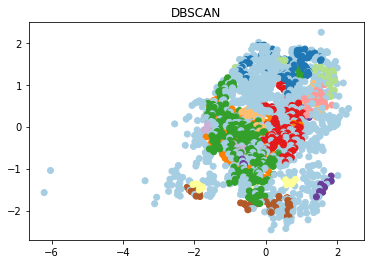

In [198]:
df1 = pd.read_csv(datasets[10] , sep =";", decimal =",", encoding = "UTF-8")#ciclo
df2 = pd.read_csv(datasets[11] , sep =";", decimal =",", encoding = "UTF-8")#bus
df_clusters1 = obterClusters(df1 , 0.2, 10)
display(df_clusters1)
df_clusters2 = obterClusters(df2 , 0.2, 5)
display(df_clusters2)

In [200]:
df_clusters1 = minMax(df_clusters1 , 'QUANTIDADE')
df_clusters2 = minMax(df_clusters2 , 'QUANTIDADE')

m = plotarGraficoClustersDuplo(df_clusters1, '#0057e9' , df_clusters2, '#F2CA19' , 1 , 0.6)
display(m)
m.save("clusters_zoneamento.html")


#plotarGraficoClustersDuplo(clusters , '#0057E9')

numero de clusters = 12
numero de clusters = 12
numero de clusters = 4
numero de clusters = 5
numero de clusters = 1
numero de clusters = 4
numero de clusters = 5
numero de clusters = 9
numero de clusters = 8
numero de clusters = 11
numero de clusters = 13
numero de clusters = 21


,NOME DO BAIRRO,LATITUDE,LONGITUDE
0,BOM RETIRO,-25.409228,-49.276760
1,CASCATINHA,-25.413470,-49.311648
2,RIVIERA,-25.436042,-49.380925
3,LAMENHA PEQUENA,-25.364845,-49.337269
4,JARDIM SOCIAL,-25.417852,-49.234731
...,...,...,...
70,BOQUEIRÃO,-25.501348,-49.236188
71,CAJURU,-25.458630,-49.206812
72,CIDADE INDUSTRIAL,-25.506966,-49.338198
73,SITIO CERCADO,-25.543151,-49.267727


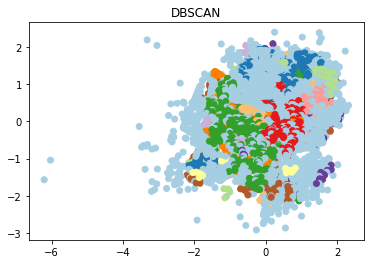

In [208]:
df['EDUCACAO_PARTICULAR'] = obterValoresCaracteristica(datasets[0] , 0.2 , 10)
df['EDUCACAO_PUBLICA'] = obterValoresCaracteristica(datasets[1] , 0.2 , 10)
df['LAZER_PARTICULAR'] = obterValoresCaracteristica(datasets[2] , 0.5 , 2)
df['LAZER_PUBLICO'] = obterValoresCaracteristica(datasets[3] , 0.5 , 2)
df['SAUDE_PARTICULAR'] = obterValoresCaracteristica(datasets[4] , 0.6 , 10)
df['SAUDE_PUBLICA'] = obterValoresCaracteristica(datasets[5] , 0.5 , 10)
df['SEGURANCA_PATRIMONIO'] = obterValoresCaracteristica(datasets[6] , 0.3 , 10)
df['SEGURANCA_VIDA'] = obterValoresCaracteristica(datasets[7] , 0.3 , 30)
df['TRANSPORTE_CICLOVIAS'] = obterValoresCaracteristica(datasets[8] , 0.2 , 30)
df['TRANSPORTE_ONIBUS'] = obterValoresCaracteristica(datasets[9] , 0.1 , 3)
df['ZONEAMENTO_COMERCIO'] = obterValoresCaracteristica(datasets[10] , 0.2 , 10)
df['ZONEAMENTO_INDUSTRIA'] = obterValoresCaracteristica(datasets[11] , 0.2, 5)
bairros = pd.read_csv("bairros_coord.csv" , sep =";", decimal =",", encoding = "UTF-8")
display(bairros)
df['BAIRRO'] = bairros["NOME DO BAIRRO"]

df.to_csv("custom_dataset.csv" , index = False , sep = ";" , decimal = ",")
